<center><b><h1>Current Research in Data Science</b></center>
<center><b><h3>Interpretable Machine Learning Group 3</b></center>
<br>
<center><b><h4>Data Pre-processing</b></center>
<br>
Team: Siddharth Bhargava, Tanveer Hannan <br>
Mentor: Chrisoph Molnar
<br>

**Problem Statement**: Bank Campaign Dataset (https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset)

#### Theory:

**Book:** https://christophm.github.io/interpretable-ml-book/

**Paper:** https://core.ac.uk/download/pdf/55631291.pdf


Key Facts about the Data:

- 22 features reduced from 150 features
- Time series : May 2008 to June 2013 (we don't have the temporal information)
- Binary Classification: successful or unsuccessful campaign




##  Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fancyimpute import IterativeImputer # requires sklearn version 0.20 / 0.21
from sklearn.preprocessing import OrdinalEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
%matplotlib inline

%load_ext autoreload
import sys
sys.path.insert(0, "..")
import os
os.chdir("..")

## Load data

In [ ]:
%load_ext autoreload
import sys
sys.path.insert(0, "..")
import os
os.chdir("..")

In [ ]:
bank_data = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis before Data Preprocessing:

We divided the data into four categories namely,

* Demographics
* Last Campaign Details
* Campaign History
* Socio-economic Indicators





#### Initial Basic *Statistics*

In [ ]:
# We have an imbalanced dataset.

bank_data["y"].value_counts()

NameError: ignored

In [ ]:
# check to see the number of missing values, indicated by the term "unknown"
cols = [x for x in bank_data.columns]
bank_data["contains_unknown"] = (bank_data[cols]=="unknown").any(axis="columns")
bank_data["contains_unknown"].value_counts()

False    30488
True     10700
Name: contains_unknown, dtype: int64

#### Demographics

1.   Education
2.   Age
3. Job
4. Marital Status 
5. Default
6. Housing
7. Loan


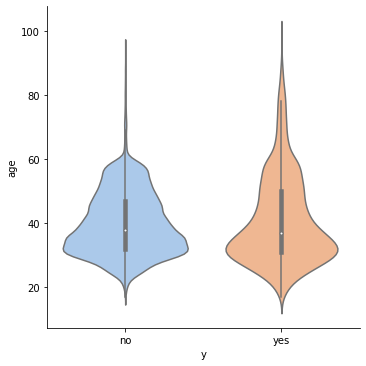

In [ ]:
# age
sns.catplot(y="age", x="y", kind="violin", palette="pastel", split=True, data=bank_data)

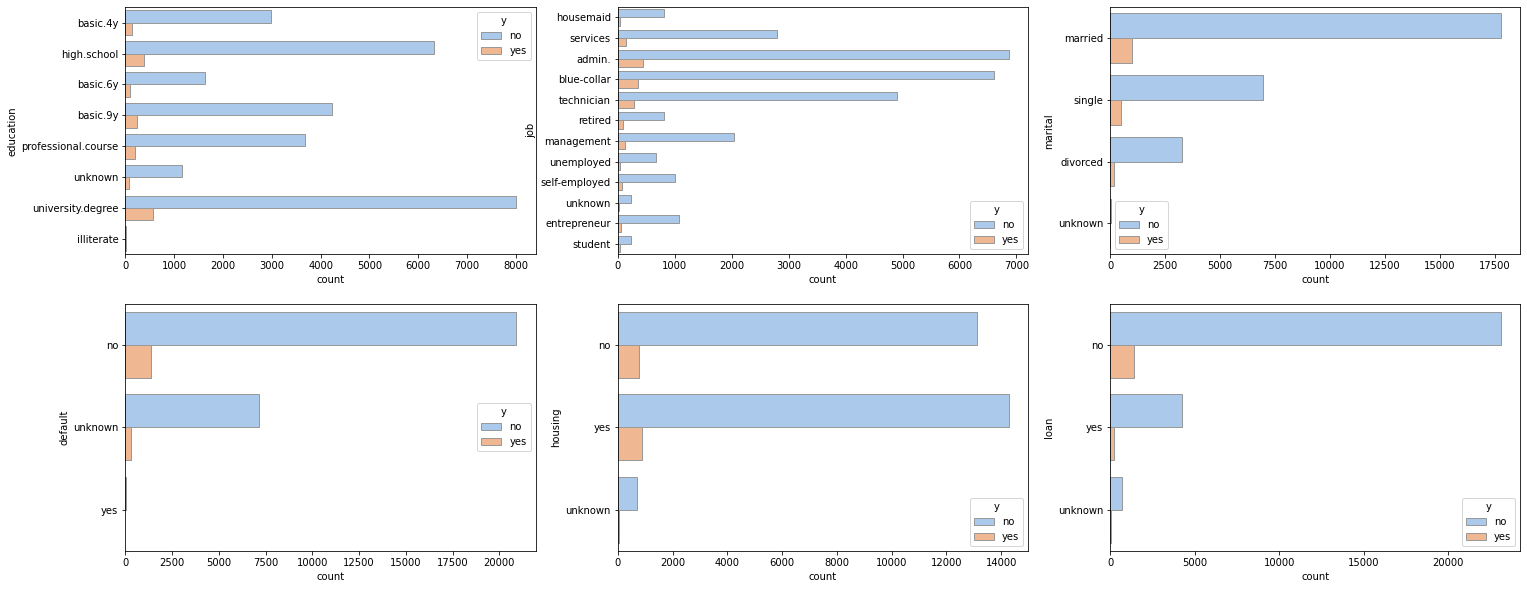

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 2])
sns.countplot(y="default", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 2])

#### Last Campaign Details

1. Contact
2. Month
3. Day of the Week
4. Duration

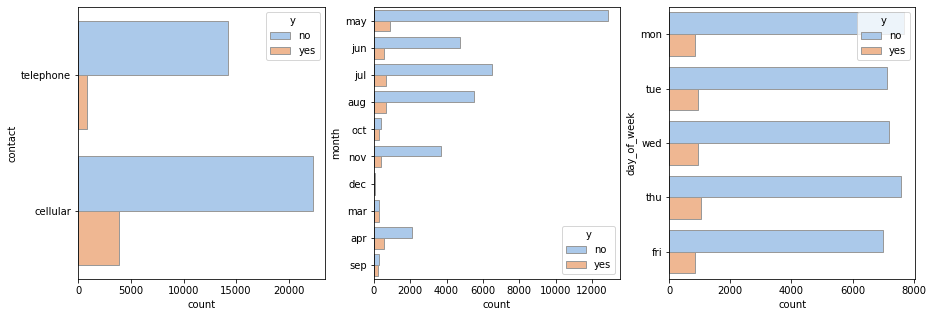

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(y="contact", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0])
sns.countplot(y="month", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1])
sns.countplot(y="day_of_week", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[2])

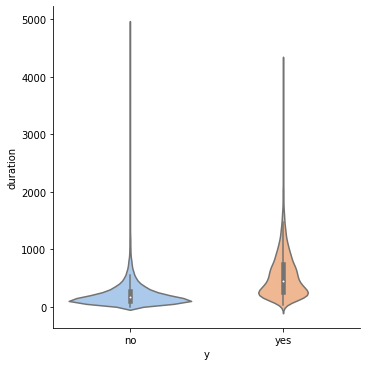

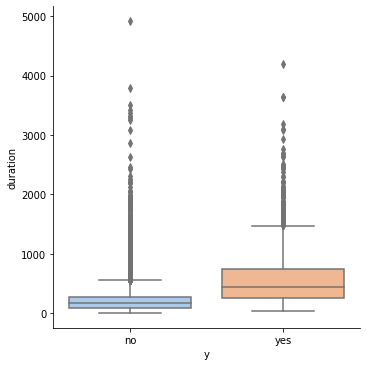

In [ ]:
sns.catplot(y="duration", x="y", kind="violin", palette="pastel", split=True, data=bank_data)
sns.catplot(y="duration", x="y", kind="box", palette="pastel", data=bank_data)

#### Campaign History

1. number of contacts in this campaign
2. number of days since last campaign
3. number of contacts before this campaign
4. outcome of previous marketing campaign

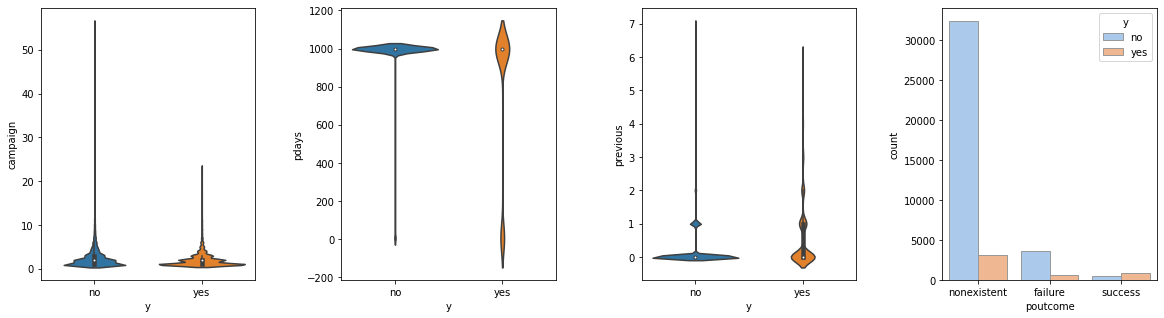

In [ ]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(141)
sns.violinplot(x="y", y="campaign",
               data=bank_data, split=True, ax=ax)

ax = fig.add_subplot(142)
sns.violinplot(x="y", y="pdays",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(143)
sns.violinplot(x="y", y="previous",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.4)
ax = fig.add_subplot(144)
sns.countplot(x="poutcome", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=ax)

In [ ]:
pdays_filtered = bank_data[bank_data["poutcome"] == "nonexistent"]["pdays"]
pdays_left = bank_data.loc[bank_data["poutcome"] != "nonexistent"]["pdays"]

In [ ]:
pdays_filtered.unique(), len(pdays_filtered)

(array([999]), 35563)

In [ ]:
pdays_left.unique(), len(pdays_left)

(array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
         12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
         20]), 5625)

In [ ]:
pdays_left.value_counts().sort_values()

20        1
25        1
26        1
27        1
21        2
19        3
22        3
18        7
17        8
16       11
0        15
8        18
14       20
15       24
1        26
11       28
13       36
5        46
10       52
12       58
7        60
2        61
9        64
4       118
6       412
3       439
999    4110
Name: pdays, dtype: int64

More than 80% of the data has "nonexistent" value and the same corresponding value of "999" as seen here. 
Based on this, we decided to leave "poutcome" in our dataset and remove "pdays" from it.

#### Socio-Economic Attributes

1. Employment Variation Rate (Quarterly)
2. Consumer Price Index (Monthly)
3. Consumer Confidence Index (Monthly)
4. Euribor 3 Month Rate (Daily)
5. Number of Employees (Quarterly)

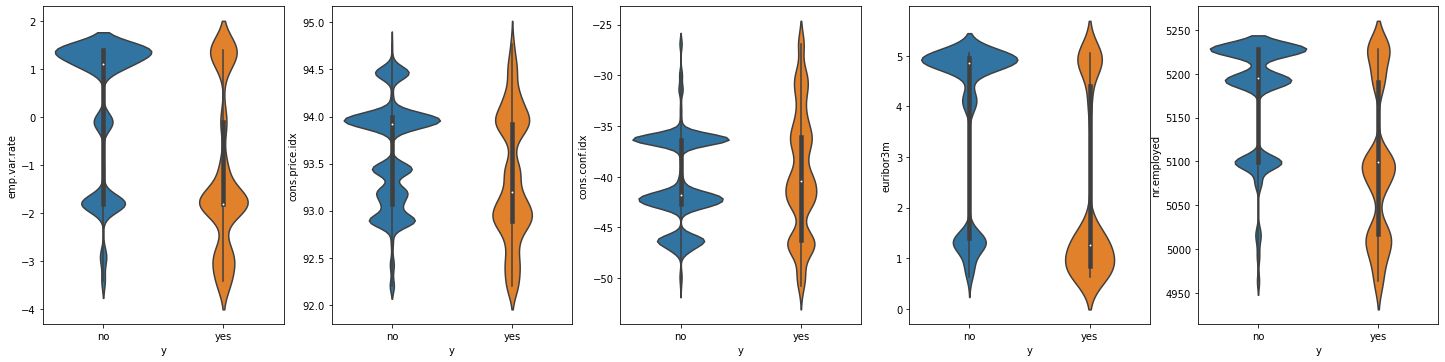

In [ ]:
# emp.var.rate		cons.conf.idx	euribor3m	nr.employed
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(151)
fig.tight_layout()
sns.violinplot(x="y", y="emp.var.rate",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(152)
sns.violinplot(x="y", y="cons.price.idx",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(153)
sns.violinplot(x="y", y="cons.conf.idx",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(154)
sns.violinplot(x="y", y="euribor3m",
               data=bank_data, split=True, ax=ax)
plt.subplots_adjust(wspace = 0.2)
ax = fig.add_subplot(155)
sns.violinplot(x="y", y="nr.employed",
               data=bank_data, split=True, ax=ax)

## Imputation:

#### Handling Missing Data: KNN Imputation vs MICE Imputation

Run the imputation.py script to generate the imputed dataset. TO use KNN Imputation call the KNNImputer and to use the MICE Imputation, call the IterativeImputer. 

#### Compare the two imputed files: KNN and MICE

In [ ]:
# load the generated datasets from the two approaches first.
bank_knn = pd.read_csv("data/imputed_bank_data_knn.csv")
bank_mice = pd.read_csv("data/imputed_bank_data_mice.csv")
bank_knn.equals(bank_mice)

False

In [ ]:
df_diff = bank_knn.eq(bank_mice)

In [ ]:
cols = [x for x in df_diff.columns]
df_diff["contains_difference"] = (df_diff[cols]==False).any(axis="columns")
df_diff["contains_difference"].value_counts()

False    39338
True      1850
Name: contains_difference, dtype: int64

Since there is not a lot of difference between the two approaches, we decided to stay with MICE imputation and drop the KNN imputation. 

Below, we have some visualizations showing the difference in the dataset after imputation.

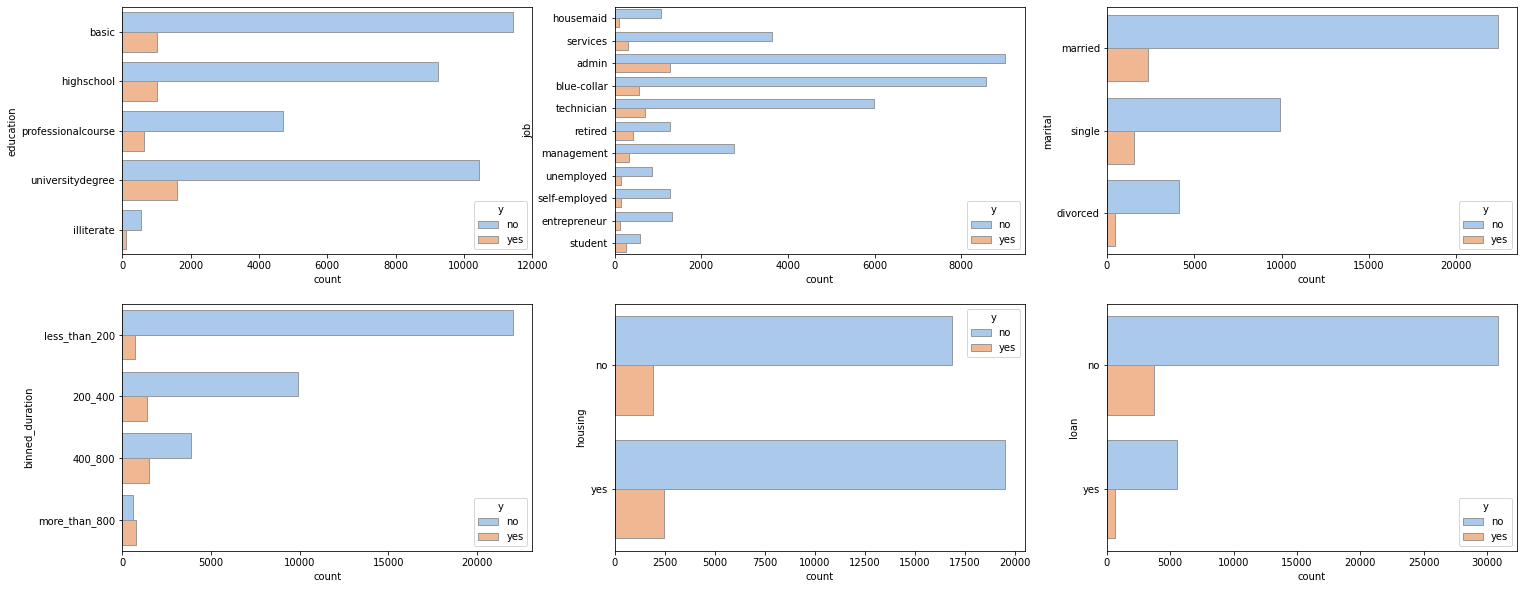

In [ ]:
# load data file generated after imputation

fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 2])
sns.countplot(y="binned_duration", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 2])

In [ ]:
# Effect on Education before and after imputation

edu = pd.DataFrame()
edu["mice"] = bank_mice["education"]
edu["raw"] = bank_raw["education"]

fig, axs = plt.subplots(1, 1, figsize=(15,7))
sns.countplot(x="value", hue="variable", data=pd.melt(edu))

NameError: ignored

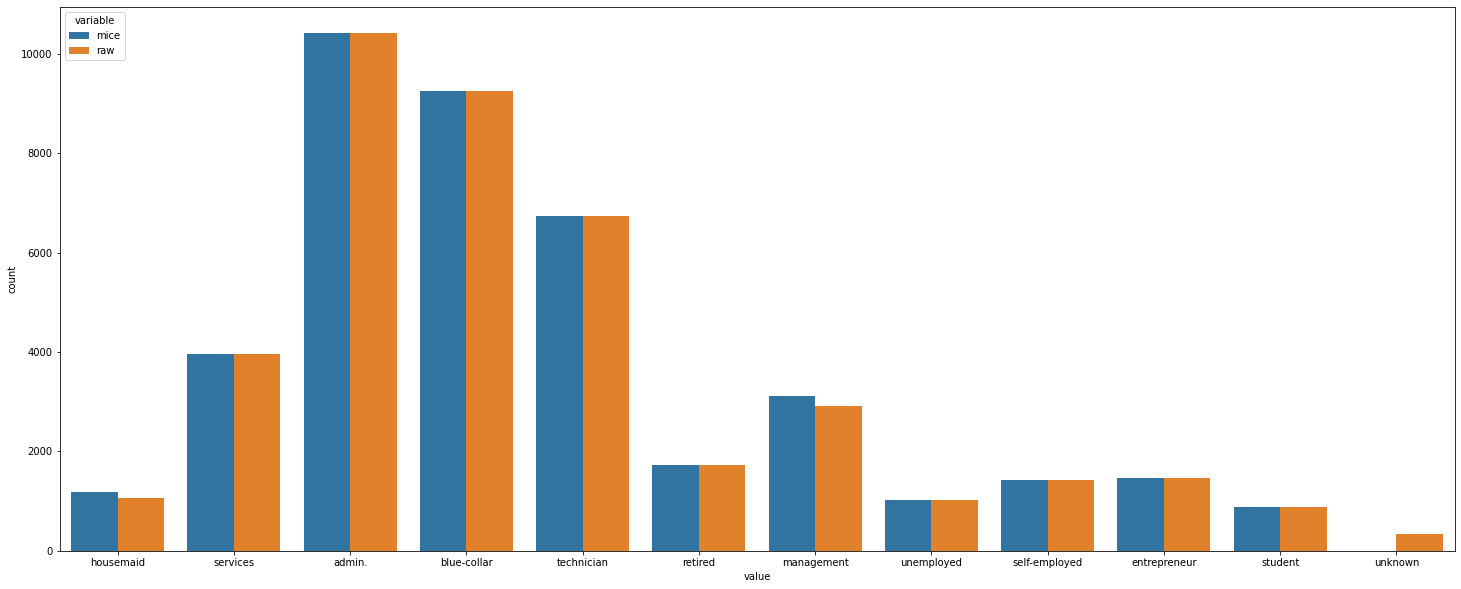

In [ ]:
# Effect on Job before and after imputation

jobs = pd.DataFrame()
jobs["mice"] = bank_mice["job"]
jobs["raw"] = bank_raw["job"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(jobs))

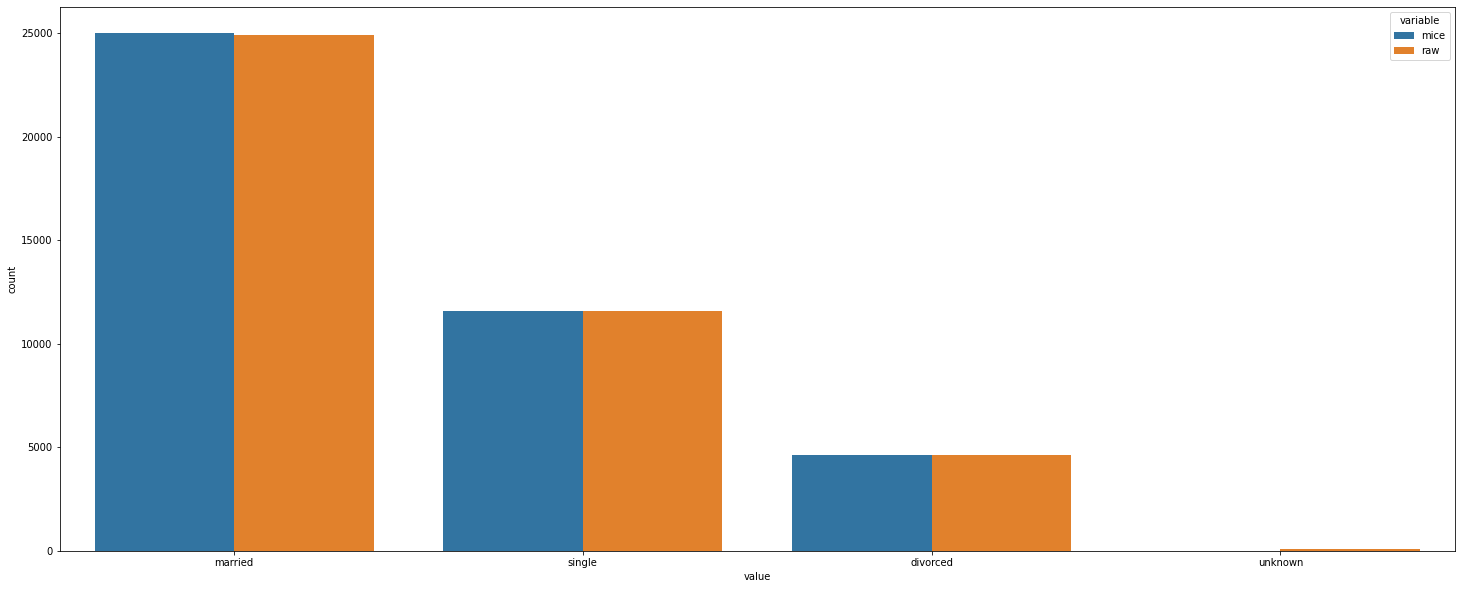

In [ ]:
# Effect on Marital Status before and after imputation

mar = pd.DataFrame()
mar["mice"] = bank_mice["marital"]
mar["raw"] = bank_raw["marital"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(mar))

## Cleaning Pipeline:

1. Imputation
2. Duplicate removal
3. Duration Binning and Outlier Removal
4. Drop non-relevant features ~ pdays, default, contact
5. Reduce Education Label Space
6. Encode Categorical Features
7. Normalize/Standardise Numeric Features

In [ ]:
class DataGenerator():

  def __init__(self, datapath, imputed, preprocessed):
    super(DataGenerator, self).__init__()

    self.imputed = imputed
    self.preprocessed = preprocessed
    if not self.preprocessed and not self.imputed:
      self.bank_data = pd.read_csv(datapath, sep=";")
    else:
      self.bank_data = pd.read_csv(datapath, index_col=0)
    self.cat_features = ["education", "job", "marital",  "month", "day_of_week",
                         "binned_duration", "poutcome", "housing", "loan", "contact"]
    self.num_features = ["age", "campaign", "previous", "emp.var.rate", "cons.price.idx", 
                    "cons.conf.idx", "euribor3m", "nr.employed"]
    self.target = ["y"]
    
    self.scaler = StandardScaler(with_mean=True,with_std=True)
    self.scaler.fit(self.bank_data[self.num_features])


  def impute_function(self):

    # Define the ordinal encoder
    encoded_bank_data = self.bank_data.copy()
    ordinal_enc_dict = {}
    cat_features = ["education", "job", "marital", "loan", "housing",
             "contact", "month", "day_of_week", "poutcome", "y"]
    # use ordinal encoder to encode all the categorical columns
    for col_name in cat_features:

      ordinal_enc_dict[col_name] = OrdinalEncoder()

      col = self.bank_data[col_name]
      list_of_indices_not_na = []
      for i, value in enumerate(col):
        if value != "unknown":
          list_of_indices_not_na.append(i)

      col.replace({"unknown": np.nan}, inplace=True)
      col_notna = col[col.notna()]
      reshaped_colvalues = col_notna.values.reshape(-1, 1)
      encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_colvalues)
      for i, value in enumerate(list_of_indices_not_na):
        encoded_bank_data[col_name][value] = encoded_vals[i]

    encoded_bank_data = encoded_bank_data.replace({"unknown": np.nan})
    # define the Imputer Object
    MICE_Imputer = IterativeImputer()

    imputed_bank_data = encoded_bank_data.copy(deep=True)

    # fit the imputation values
    imputed_bank_data.iloc[:, :] = np.round(MICE_Imputer.fit_transform(imputed_bank_data))

    # reverse the ordinal encoding
    for col in cat_features:
      reshaped_col = imputed_bank_data[col].values.reshape(-1, 1)
      imputed_bank_data[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

    # save a copy of the imputed data for future use. 
    imputed_bank_data.to_csv("bank_data_mice.csv", sep=";", index=False)
    
    return imputed_bank_data


  def outlier_removal(self, column, quantile = 0.99):

    q = self.bank_data[column].quantile(quantile)
    return  self.bank_data[self.bank_data[column] < q]


  def bin_duration(self):

    duration_bin_labels = ['less than 200sec', '200sec - 400sec', '400sec - 800sec', 
                    'more than 800sec']
    dur_bin_size = [-1, 200, 400, 800, 200000]

    # remove outliers
    self.bank_data = self.outlier_removal(column="duration", quantile=0.99)

    # bin duration
    self.bank_data["binned_duration"] = pd.cut(self.bank_data["duration"],
                                               bins=dur_bin_size,
                                               labels=duration_bin_labels)
    # drop the original duration column
    self.bank_data.drop(columns=["duration"], inplace=True)


  def define_cat_maps(self):

    self.category_map = {}
    for i, feature in enumerate(self.cat_features + self.target):
      if feature == "binned_duration":
        self.category_map[i] = ['200sec - 400sec', '400sec - 800sec',
                                'less than 200sec', 'more than 800sec']
        continue
      self.category_map[i] = sorted(self.bank_data[feature].unique())

    self.cat_vars_ord ={}
    for i in range(len(list(self.category_map.keys())) - 1):
      self.cat_vars_ord[i] = len(self.category_map[i]) 

    self.cat_vars_ohe = {}
    for i, (_,v) in enumerate(self.cat_vars_ord.items()):
      if i == 0:
        prev_key = 0 
        prev_value = v
        self.cat_vars_ohe[i] = v
        continue
      self.cat_vars_ohe[prev_key + prev_value] = v
      prev_key = prev_key + prev_value 
      prev_value = v


  def data_preprocessing(self):
    '''
    '''
    
    # Step 1: Drop Duplicates
    self.bank_data.drop_duplicates(subset=None, keep='first', inplace=True)

    # Step 2: Drop non-relevant columns as decided by initial EDA
    self.bank_data.drop(columns=["default", "pdays"], inplace = True)

    # Step 3: Imputation
    if not self.imputed:
      self.bank_data = self.impute_function()

    # Step 4: Bin Duration and drop Outliers
    self.bin_duration()

    # Step 5: Edit some Categorical Features values
    self.bank_data.loc[self.bank_data['education'] == 'basic.9y','education'] = 'basic'
    self.bank_data.loc[self.bank_data['education'] == 'basic.6y','education'] = 'basic'
    self.bank_data.loc[self.bank_data['education'] == 'basic.4y','education'] = 'basic'
    self.bank_data['education'] = self.bank_data['education'].str.replace('.',' ')
    self.bank_data['job'] = self.bank_data['job'].str.replace('.',' ')

    # Step 6: One-Hot Encode Categorical Features
    
    self.define_cat_maps()

    self.pre_one_hot_encoded_data = self.bank_data.copy()
    self.pre_one_hot_encoded_data.drop(columns=["y"], inplace=True)
    self.pre_one_hot_encoded_data = self.pre_one_hot_encoded_data[[c 
                                                                   for c in self.pre_one_hot_encoded_data
                                                                   if c not in self.num_features] 
                                                                  + self.num_features]
    self.pre_one_hot_encoded_data.reset_index(drop=True, inplace=True)

    self.bank_data = pd.get_dummies(self.bank_data, columns=self.cat_features)
    self.bank_data = pd.get_dummies(self.bank_data, columns=self.target, drop_first=True)
       

  def load_data(self):

    if not self.preprocessed:
      self.data_preprocessing()
    
    X = self.bank_data.drop(columns=["y_yes"])
    y = self.bank_data["y_yes"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
    
    x_train[self.num_features] = self.scaler.transform(x_train[self.num_features])
    x_test[self.num_features] = self.scaler.transform(x_test[self.num_features])
    
    # reorder to place one-hot encoded features at the start
    x_train = x_train[[c for c in x_train if c not in self.num_features]
                      + self.num_features]
    x_test = x_test[[c for c in x_train if c not in self.num_features]
                      + self.num_features]
    
    self.column_names = x_train.columns

    return x_train, x_test, y_train, y_test


  def reverse_cat_features(self, data):

    data = np.array(data).reshape((1, len(self.column_names)))
    X_orig_ord = ohe_to_ord(data, self.cat_vars_ohe)[0]
    cat_vars = []
    for i, (_, v) in enumerate(self.category_map.items()):

      cat_orig = v[int(X_orig_ord[0, i])]
      cat_vars.append(cat_orig)

    return cat_vars[:-1]


  def rev_transform(self, data, rev_num_features=True, rev_cat_features=True):
    '''
    accepts one dataframe row containing one hot encoded values. Shape (1, 55)
    '''

    if rev_cat_features and rev_num_features:
      feature_values = self.reverse_cat_features(data) + list(self.scaler.inverse_transform(data[self.num_features]))
      data = pd.DataFrame([feature_values], columns=self.cat_features + self.num_features)

    elif rev_num_features:
      data[self.num_features] = self.scaler.inverse_transform(data[self.num_features])
    
    else:
      feature_values = self.rev_cat_features(data) + list(data[self.num_features])
      data = pd.DataFrame([feature_values], columns=self.cat_features + self.num_features)
    return data
  

  def transform(self, instance):

    self.pre_one_hot_encoded_data.loc[len(self.pre_one_hot_encoded_data)] = instance
    encoded_data = pd.get_dummies(
        self.pre_one_hot_encoded_data, columns=self.cat_features)
    encoded_data[self.num_features] = self.scaler.transform(encoded_data[self.num_features])
    encoded_data = encoded_data[[c for c in encoded_data 
                                 if c not in self.num_features] 
                                + self.num_features]

    return encoded_data.loc[len(encoded_data)-1]

## EDA after Data Cleaning


- Distribution of binned duration. Should the chosen range be different?


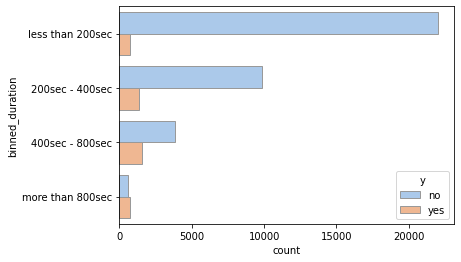

In [ ]:
# load the data after imputation and run the bin_duration function to bin the feature "duration"

imputed_bank_data = pd.read_csv("data/imputed_bank_data_mice.csv") 

def outlier_removal(imputed_bank_data, column, quantile = 0.99):

    q = imputed_bank_data[column].quantile(quantile)
    return  imputed_bank_data[imputed_bank_data[column] < q]

def bin_duration(imputed_bank_data):

    duration_bin_labels = ['less than 200sec', '200sec - 400sec', '400sec - 800sec', 
                    'more than 800sec']
    dur_bin_size = [-1, 200, 400, 800, 200000]

    # remove outliers
    imputed_bank_data = outlier_removal(column="duration", quantile=0.99)

    # bin duration
    imputed_bank_data["binned_duration"] = pd.cut(imputed_bank_data["duration"],
                                               bins=dur_bin_size,
                                               labels=duration_bin_labels)
    # drop the original duration column
    imputed_bank_data.drop(columns=["duration"], inplace=True)

    return imputed_bank_data

imputed_bank_data = bin_duration(imputed_bank_data)

# visualize binned duration
imputed_bank_data.head()
sns.countplot(y="binned_duration", hue="y",
            palette="pastel", edgecolor=".6",
            data=imputed_bank_data)

Since the current bins seem to distribute the feature without bias, we decided to keep them as decided. 